In [1]:
from glycowork.motif.draw import GlycoDraw

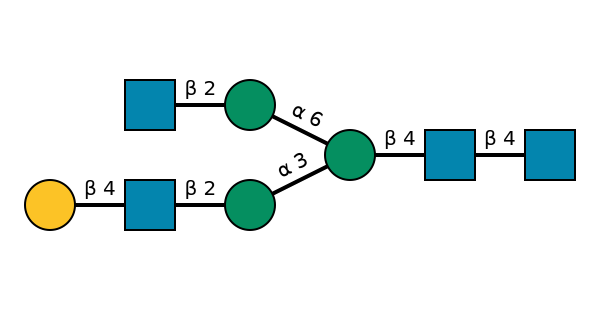

In [2]:
GlycoDraw("Gal(b1-3)GalNAc(b1-4)Gal(b1-4)Glc", highlight_motif = "Gal(b1-3)GalNAc")
GlycoDraw("Fuc(a1-2)Gal(b1-3)GlcNAc", highlight_motif = "Fuc")
GlycoDraw("Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc")


In [27]:
from glycowork.motif.graph import  glycan_to_nxGraph

In [29]:
import pandas as pd

In [17]:
flex_data_path = '/Users/xakdze/PycharmProjects/GlyContact_analyses/data/glycan_graphs.pkl'

def load_data():
    """Load glycan flexibility data and binding data."""
    with open(flex_data_path, 'rb') as file:
        flex_data = pickle.load(file)
    # binding_df = pd.read_csv(flex_data_path)
    return flex_data

In [18]:
import pickle
import networkx as nx

In [19]:
glycan_graphs =load_data()

In [15]:
list(glycan_graphs['Fuc(a1-2)Gal(b1-3)GlcNAc'].nodes)

NameError: name 'glycan_graphs' is not defined

In [16]:
luc_graph = glycan_graphs['Gal(b1-3)GalNAc(b1-4)Gal(b1-4)Glc'].copy()

NameError: name 'glycan_graphs' is not defined

In [78]:
mygraph = glycan_to_nxGraph('Rha(a1-3)Rha(a1-2)Gal')
oldgraph = glycan_graphs['Rha(a1-3)Rha(a1-2)Gal']
if len(mygraph.nodes)%2 ==1:
    new_max = len(mygraph.nodes)
    old_max = len(oldgraph.nodes)
    map_dict = dict(zip(range(0, new_max, 2),range(old_max,0,-1)))
else:
    new_max = len(mygraph.nodes)-1
    old_max = len(oldgraph.nodes)
    map_dict = dict(zip(range(0, new_max, 2),range(old_max,0,-1)))


In [81]:
dict(zip(range(0, new_max, 2),range(old_max,0,-1)))

{0: 4, 2: 3, 4: 2}

In [82]:
def get_daniel_to_luc_graph_map(daniel_graph, luc_graph):
    if len(daniel_graph.nodes)%2 ==1:
        new_max = len(daniel_graph.nodes)
        old_max = len(luc_graph.nodes)
        map_dict = dict(zip(range(0, new_max, 2),range(old_max,0,-1)))
    else:
        new_max = len(daniel_graph.nodes)-1
        old_max = len(luc_graph.nodes)
        map_dict = dict(zip(range(0, new_max, 2),range(old_max,0,-1)))
    return map_dict

In [94]:
d_graph = glycan_to_nxGraph('Fuc(a1-2)Gal(b1-3)GlcNAc')
luc_graph = glycan_graphs['Fuc(a1-2)Gal(b1-3)GlcNAc']
g_map = get_daniel_to_luc_graph_map(d_graph, luc_graph)
g_map

{0: 4, 2: 3, 4: 2}

In [126]:
d_graph = glycan_to_nxGraph('Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc')
luc_graph = glycan_graphs['Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc']
g_map = get_daniel_to_luc_graph_map(d_graph, luc_graph)
g_map

{0: 5, 2: 4, 4: 3, 6: 2}

In [125]:
#daniel_selected_nodes = [0, 2, 4,6]
luc_selected_nodes = []
for node in daniel_selected_nodes:
    if node in g_map:
        luc_selected_nodes.append(g_map[node])
luc_selected_nodes

[5, 4, 3, 2]

In [93]:
luc_graph.nodes[g_map[0]]

{'Monosaccharide': 'Fuc(a1-2)',
 'Mean Score': 2.1199890089725764,
 'Median Score': 2.1202326342463493,
 'Weighted Score': 2.12907997324471,
 'weighted_mean_flexibility': 0.6843510982235121}

In [120]:
## alternative mapping func
#d_graph = glycan_to_nxGraph('Fuc(a1-2)Gal(b1-3)GlcNAc')
#luc_graph = glycan_graphs['Fuc(a1-2)Gal(b1-3)GlcNAc']
d_graph =glycan_to_nxGraph('Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc')
luc_graph = glycan_graphs['Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc']

def create_mapping(daniel_graph, luc_graph):
    node_count_daniel = len(daniel_graph.nodes)
    node_count_luc = len(luc_graph.nodes)
    if node_count_daniel % 2 == 1:
        max_index = node_count_daniel
    else:
        max_index = node_count_daniel - 1
    return dict(zip(range(0, max_index, 2), range(node_count_luc, 0, -1)))

mapping = create_mapping(d_graph, luc_graph)
mapping


{0: 5, 2: 4, 4: 3, 6: 2}

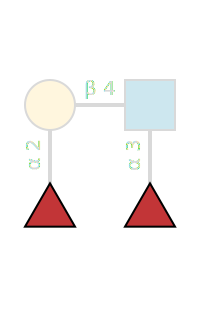

In [116]:
GlycoDraw("Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc", highlight_motif="Fuc")

In [6]:
daniel_graph = glycan_to_nxGraph('Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc')
nx.draw(daniel_graph, with_labels=True)

NameError: name 'glycan_to_nxGraph' is not defined

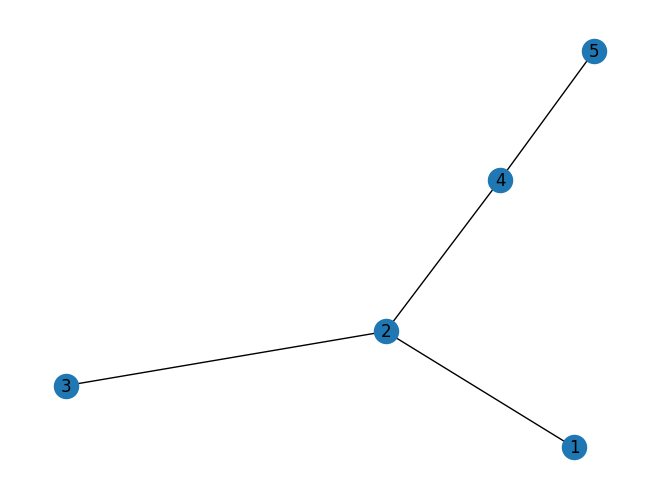

In [118]:
nx.draw(glycan_graphs['Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc'], with_labels=True)


In [111]:
luc_graph.__dict__

{'graph': {},
 '_node': {3: {'Monosaccharide': 'Gal(b1-3)',
   'Mean Score': 2.0702558295646063,
   'Median Score': 2.1024119952926412,
   'Weighted Score': 2.092785973050695,
   'weighted_mean_flexibility': 0.36258494150584986},
  2: {'Monosaccharide': 'GlcNAc(b1-1)',
   'Mean Score': 2.538361548252093,
   'Median Score': 2.5042925303569064,
   'Weighted Score': 2.5166298042982795,
   'weighted_mean_flexibility': 0.5460559610705573},
  1: {'Monosaccharide': '-R',
   'Mean Score': 0.46005027492841083,
   'Median Score': 0.4585103988647461,
   'Weighted Score': 0.46351294226347717,
   'weighted_mean_flexibility': 0.8475338132853361},
  4: {'Monosaccharide': 'Fuc(a1-2)',
   'Mean Score': 2.1199890089725764,
   'Median Score': 2.1202326342463493,
   'Weighted Score': 2.12907997324471,
   'weighted_mean_flexibility': 0.6843510982235121}},
 '_adj': {3: {2: {}, 4: {}}, 2: {3: {}, 1: {}}, 1: {2: {}}, 4: {3: {}}},
 'nodes': NodeView((3, 2, 1, 4)),
 'degree': DegreeView({3: 2, 2: 2, 1: 1, 4: 1}

In [95]:
luc_graph.nodes[]

SyntaxError: invalid syntax (3242455246.py, line 1)

In [96]:

map_dict

{0: 4, 2: 3, 4: 2}

In [75]:
map_dict

{0: 5, 2: 4, 4: 3, 6: 2}

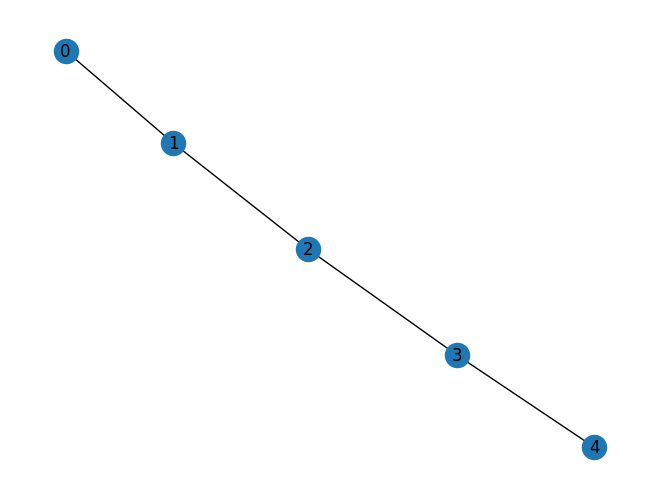

In [97]:
daniel_graph = glycan_to_nxGraph('Rha(a1-3)Rha(a1-2)Gal')
nx.draw(daniel_graph, with_labels=True)

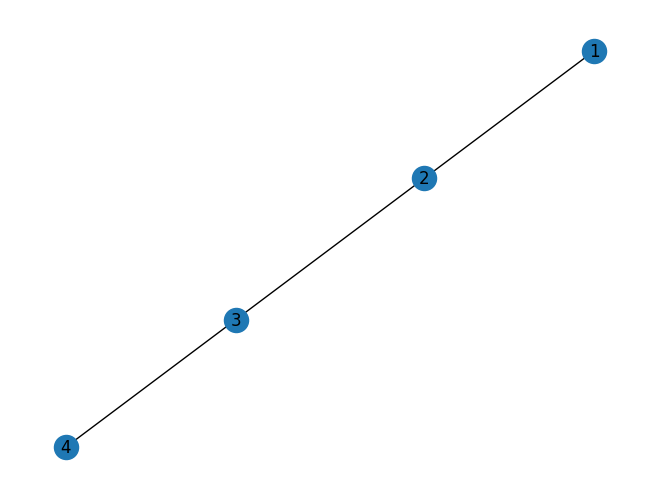

In [99]:
nx.draw(glycan_graphs['Rha(a1-3)Rha(a1-2)Gal'], with_labels=True)

In [62]:
map_dic

{0: 1, 2: 3, 4: 5, 6: 7}

In [28]:
daniel_graph = glycan_to_nxGraph('Gal(b1-3)GalNAc(b1-4)Gal(b1-4)Glc')

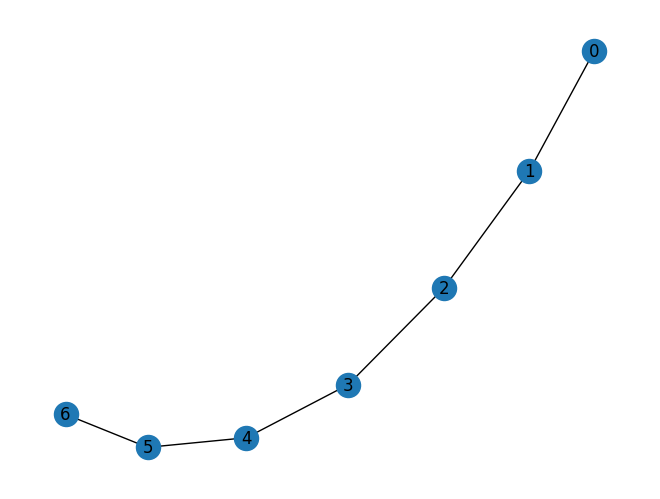

In [54]:
nx.draw(daniel_graph, with_labels=True)

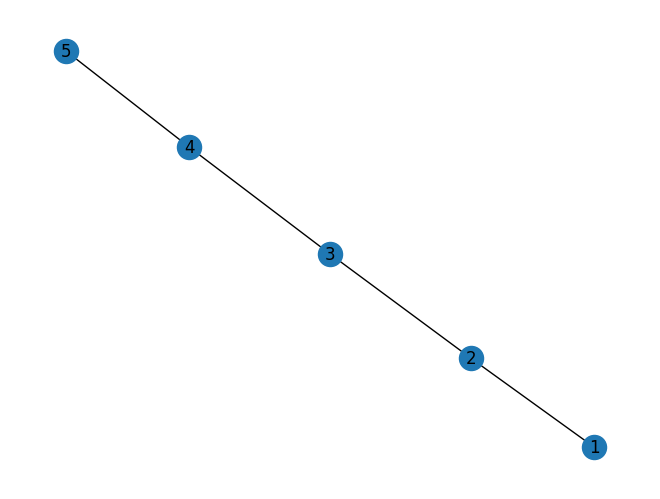

In [55]:
nx.draw(luc_graph, with_labels=True)

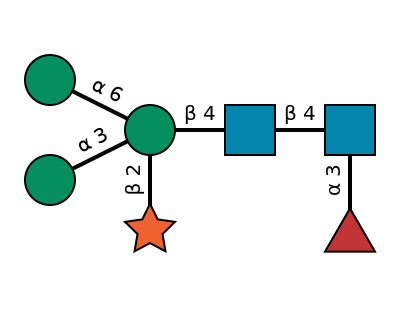

In [6]:
GlycoDraw("Man(a1-3)[Xyl(b1-2)][Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc")

True


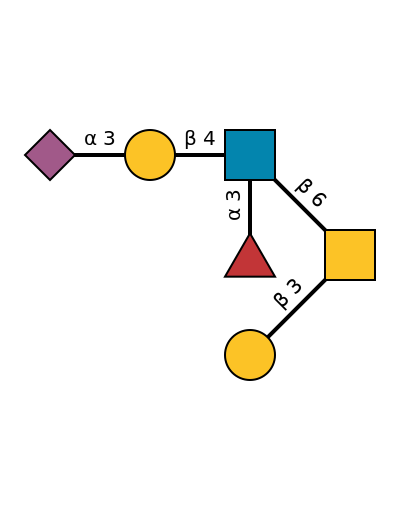

In [18]:
from glycowork.motif.graph import subgraph_isomorphism, glycan_to_nxGraph

print(subgraph_isomorphism('Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
                     'Fuc(a1-?)[Gal(b1-?)]GlcNAc', termini_list = ['terminal']))


GlycoDraw("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc")


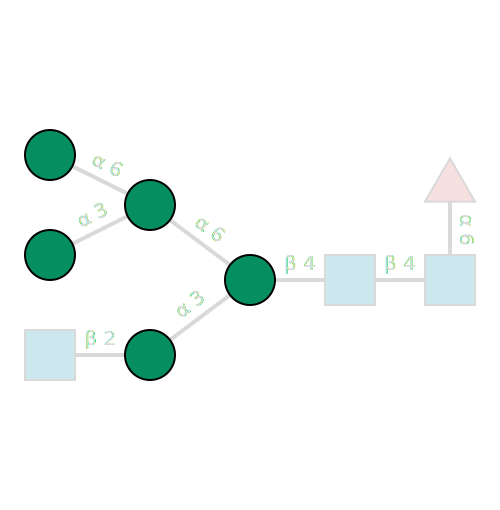

In [101]:
GlycoDraw("GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc", highlight_motif="Man")

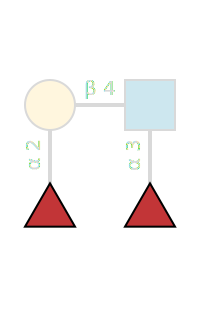

In [102]:
GlycoDraw("Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc", highlight_motif="Fuc")

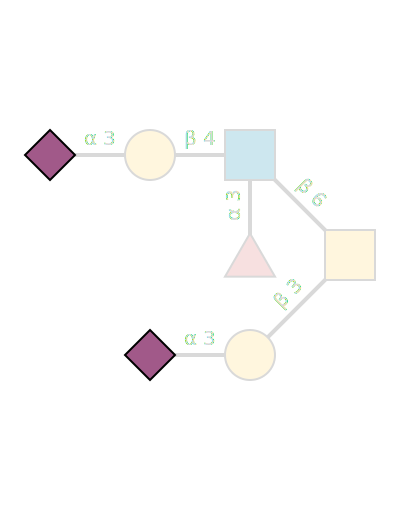

In [103]:
GlycoDraw("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc", highlight_motif="Neu5Ac")

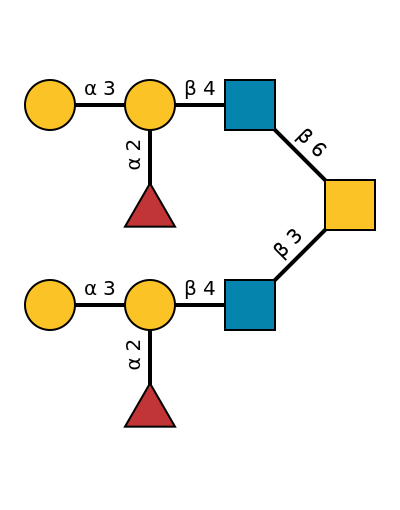

In [104]:
GlycoDraw("Fuc(a1-2)[Gal(a1-3)]Gal(b1-4)GlcNAc(b1-3)[Fuc(a1-2)[Gal(a1-3)]Gal(b1-4)GlcNAc(b1-6)]GalNAc")

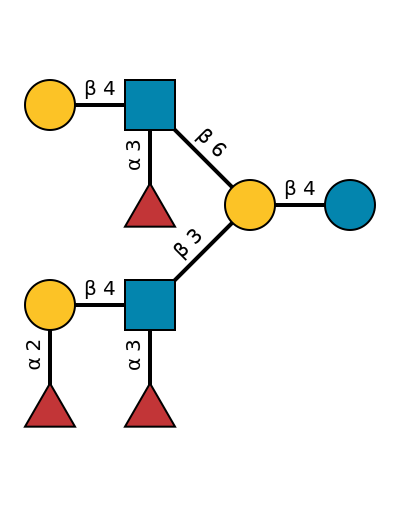

In [122]:
GlycoDraw("Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Gal(b1-4)Glc")

In [31]:
glycan_graphs["Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Gal(b1-4)Glc"].__dict__

{'graph': {},
 '_node': {2: {'Monosaccharide': 'Glc(b1-1)',
   'Mean Score': 2.0514767858432608,
   'Median Score': 2.244769612327218,
   'Weighted Score': 2.128792897366927,
   'weighted_mean_flexibility': 12.17857534246575},
  1: {'Monosaccharide': '-R',
   'Mean Score': 0.46870365738868713,
   'Median Score': 0.5194512158632278,
   'Weighted Score': 0.492240047726902,
   'weighted_mean_flexibility': 21.947800819918005},
  4: {'Monosaccharide': 'GlcNAc(b1-6)',
   'Mean Score': 1.773262549820356,
   'Median Score': 1.6837695762515068,
   'Weighted Score': 1.7021496458169612,
   'weighted_mean_flexibility': 17.064866673332663},
  3: {'Monosaccharide': 'Gal(b1-4)',
   'Mean Score': 1.0813572494313122,
   'Median Score': 1.0846662780968472,
   'Weighted Score': 1.0457681036238264,
   'weighted_mean_flexibility': 6.275166123387661},
  8: {'Monosaccharide': 'Gal(b1-4)',
   'Mean Score': 1.7647929069120436,
   'Median Score': 1.7578037350904197,
   'Weighted Score': 1.7861381799561076,
   '

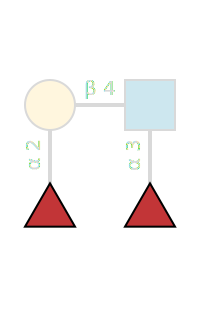

In [28]:
GlycoDraw("Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc", highlight_motif= "Fuc")

2Fuc:
daniel [0, 1, 2, 3, 4, 5, 6]
luc [3, 2, 5, 4, 1]
3Fuc:
daniel [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
luc [2, 1, 4, 3, 8, 7, 5, 6, 10, 9]


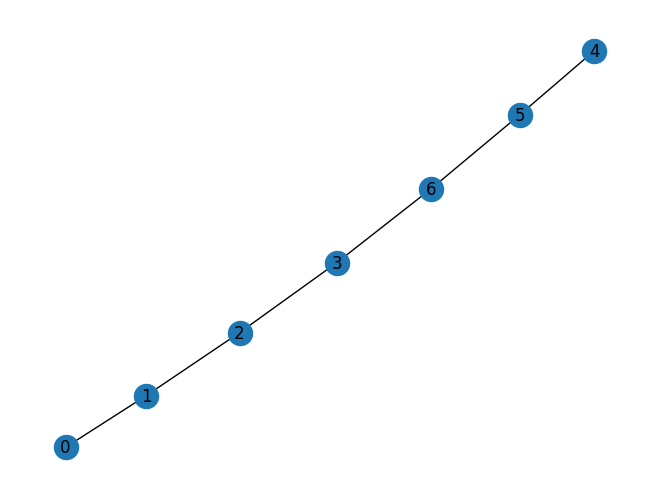

In [35]:
import networkx as nx
from glycowork.motif.graph import glycan_to_nxGraph
nx.draw(glycan_to_nxGraph('Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc'), with_labels=True)
print("2Fuc:")
print("daniel", glycan_to_nxGraph('Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc').nodes)
print('luc',glycan_graphs['Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc'].nodes)
print("3Fuc:")
print("daniel",glycan_to_nxGraph("Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Gal(b1-4)Glc").nodes)
print("luc",glycan_graphs["Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Gal(b1-4)Glc"].nodes)

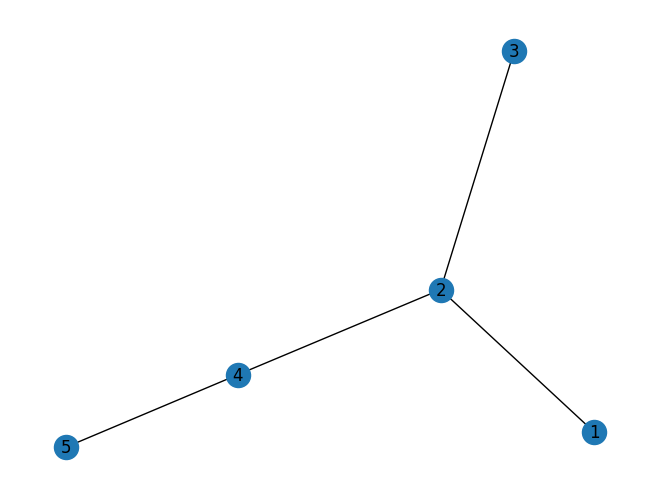

In [22]:
nx.draw(glycan_graphs['Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc'], with_labels=True)

In [23]:
glycan_graphs['Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc'].nodes


NodeView((3, 2, 5, 4, 1))

In [27]:
glycan_graphs['Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc'].__dict__

{'graph': {},
 '_node': {3: {'Monosaccharide': 'Fuc(a1-3)',
   'Mean Score': 1.763120694970712,
   'Median Score': 1.749811589717865,
   'Weighted Score': 1.7597374506394274,
   'weighted_mean_flexibility': 0.6866602260226038},
  2: {'Monosaccharide': 'GlcNAc(b1-1)',
   'Mean Score': 2.1611419503344225,
   'Median Score': 2.158357013016939,
   'Weighted Score': 2.1689804389134233,
   'weighted_mean_flexibility': 0.42260358035803125},
  5: {'Monosaccharide': 'Fuc(a1-2)',
   'Mean Score': 2.157345515722409,
   'Median Score': 2.18301942886319,
   'Weighted Score': 2.170830920556838,
   'weighted_mean_flexibility': 0.9650379437943786},
  4: {'Monosaccharide': 'Gal(b1-4)',
   'Mean Score': 1.6548255177214741,
   'Median Score': 1.666945289936848,
   'Weighted Score': 1.6512541135026229,
   'weighted_mean_flexibility': 0.48598685868586866},
  1: {'Monosaccharide': '-R',
   'Mean Score': 0.4869304597377777,
   'Median Score': 0.47832901775836945,
   'Weighted Score': 0.48961252550838447,
   

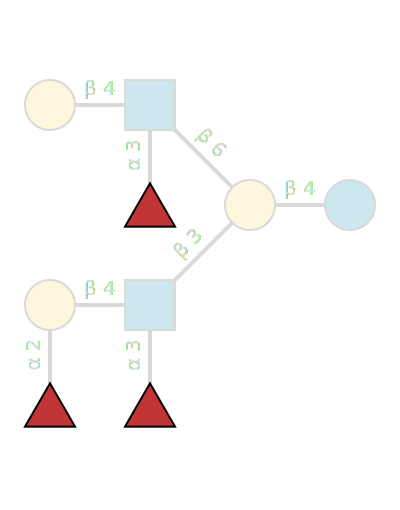

In [5]:
from glycowork.motif.draw import GlycoDraw
GlycoDraw("Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Gal(b1-4)Glc", highlight_motif="Fuc")
